#Mouafak Alsaid Hasan

##Homework-04 Nonparametric Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

##Importing Data from the homework file

In [29]:
data_set = np.genfromtxt("hw04_data_set.csv", delimiter=",")
training_inputs,training_labels, test_labels, test_inputs = [], [],[], []

inputs = np.array(data_set[1:len(data_set), 0])
labels = np.array(data_set[1:len(data_set), 1])

for i in range(len(data_set) - 1): 
  if i < 100:
    training_inputs.append(data_set[i + 1,0]) 
    training_labels.append(data_set[i + 1,1])
  else:
    test_inputs.append(data_set[i + 1,0]) 
    test_labels.append(data_set[i + 1,1])  

training_inputs, training_labels = np.array(training_inputs), np.array(training_labels)
test_inputs, test_labels = np.array(test_inputs), np.array(test_labels)




##Definitions

In [30]:
h = 3
minimum_value = 0
maximum_value = 60
left_borders = np.arange(minimum_value, maximum_value, h)
right_borders = np.arange(minimum_value + h, maximum_value + h, h)
data_interval = np.linspace(minimum_value, maximum_value, 1601)

def RMSE(Y_truth, Y_predicted):
  sum = 0.0
  K = len(Y_truth)
  for i in range(K):
    sum += (Y_truth[i] - Y_predicted[i]) ** 2
  return np.sqrt(sum/K)

##Regressogram Algorithm

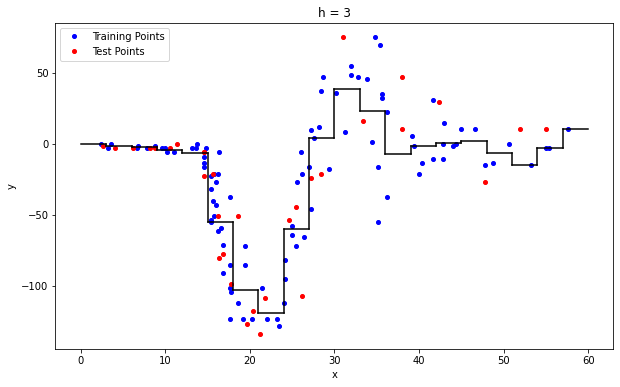

In [31]:
def regressogram(X,Y, L_borders, R_borders):
  
  values = []
  for i in range(len(left_borders)):
    sum , counter= 0.0, 0
    for j in range(len(X)):
      if X[j] >= left_borders[i] and X[j] < right_borders[i]:
        sum += Y[j]
        counter += 1
    values.append(sum/counter)
  return np.array(values) 



  

def y_predicted(X,Y, left_borders, right_borders, estimators):
  y_pred_scores = []
  for i in range(len(X)):
    for j in range(len(left_borders)):
      if X[i] >= left_borders[j] and X[i] < right_borders[j]:
        y_pred_scores.append(estimators[j])
  return np.array(y_pred_scores)


estimators = regressogram(training_inputs, training_labels, left_borders, right_borders)
y_pr = y_predicted(test_inputs, test_labels,left_borders, right_borders, estimators)


#Plotting the regressogram and the data points
plt.figure(figsize=(10,6))
plt.plot(training_inputs, training_labels, "b.", markersize= 8, label='Training Points', color ='Blue')
plt.plot(test_inputs, test_labels, "r.", markersize= 8, label= 'Test Points', color = 'Red')
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [estimators[b], estimators[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [estimators[b], estimators[b + 1]], "k-")    

plt.ylabel('y')
plt.xlabel('x')
plt.title(label = ("h = " + str(h)))
plt.legend(loc = 'upper left')
plt.show()
plt.show()





##The Root Mean Square Error RMSE of Regressogram Algorithm

In [32]:
reg_error = RMSE(test_labels, y_pr)
print("RMSE is ", reg_error, "When h is ", h)

RMSE is  24.25985527058772 When h is  3


##Running Mean Smoother Algorithm

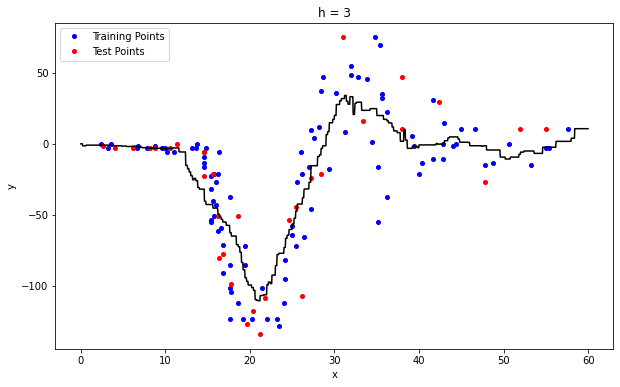

In [33]:
def w(u):
  if np.absolute(u) < 1:
    return 1
  else:
    return 0

def score_function(X, Y, x, bin):
  K = len(X)
  sum = 0
  denomenator = 0
  for i in range(K):
    sum += w((x - X[i]) / bin) * Y[i]
    denomenator += w((x - X[i]) / bin)
  return sum / denomenator

def _scores(X,Y, test_X):
  scores = []
  K = len(test_X)
  for i in range(K):
    scores.append(score_function(X, Y, test_X[i],h))
  return np.array(scores)

y_pr_scores = _scores(training_inputs, training_labels, test_inputs)

#Plotting the regressogram and the data points
plt.figure(figsize=(10,6))
plt.plot(training_inputs, training_labels, "b.", markersize= 8, label='Training Points', color ='Blue')
plt.plot(test_inputs, test_labels, "r.", markersize= 8, label= 'Test Points', color = 'Red')
plt.plot(data_interval, _scores(training_inputs, training_labels, data_interval), "k-")


plt.ylabel('y')
plt.xlabel('x')
plt.title(label = ("h = " + str(h)))
plt.legend(loc = 'upper left')
plt.show()





##The Root Mean Square Error RMSE of Running Mean Smoother 

In [34]:
rms_error = RMSE(test_labels, y_pr_scores)
print("RMSE is ", rms_error, "When h is ", h)

RMSE is  23.476371819518477 When h is  3


##Kernal Smoother Algorithm

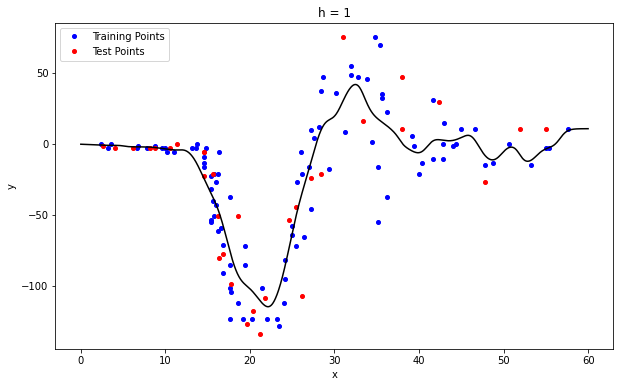

In [35]:
def Kernal(u):
  return (1/(2 * (math.pi)) ** 0.5 ) * np.exp(-(u * u)/2) 


def K_score_function(X, Y, x, bin):
  K = len(X)
  sum = 0
  denomenator = 0
  for i in range(K):
    sum += Kernal((x - X[i]) / bin) * Y[i]
    denomenator += Kernal((x - X[i]) / bin)
  return sum / denomenator

def K_scores(X,Y, test_X):
  scores = []
  K = len(test_X)
  for i in range(K):
    scores.append(K_score_function(X, Y, test_X[i],1))
  return np.array(scores)

y_ke_prid = K_scores(training_inputs, training_labels, test_inputs)

#Plotting the regressogram and the data points
plt.figure(figsize=(10,6))
plt.plot(training_inputs, training_labels, "b.", markersize= 8, label='Training Points', color ='Blue')
plt.plot(test_inputs, test_labels, "r.", markersize= 8, label= 'Test Points', color = 'Red')
plt.plot(data_interval, K_scores(training_inputs, training_labels, data_interval), "k-")

plt.ylabel('y')
plt.xlabel('x')
plt.title(label = ("h = " + str(1)))
plt.legend(loc = 'upper left')
plt.show()


##The Root Mean Square Error RMSE of Kernal Smoother

In [36]:
k_error = RMSE(test_labels, y_ke_prid)
print("RMSE is ", k_error, "When h is ", 1)

RMSE is  24.167246266469398 When h is  1
